In [16]:
import sys
sys.version
!pip install -Uqq fastai
!pip install torchvision
!pip install -Uqq fastbook
!pip install -Uqq fastai duckduckgo_search

In [17]:
from fastai.imports import *
from fastai.vision.all import *
from fastai.data.all import *
import fastbook
fastbook.setup_book()
from fastai.callback.preds import get_image_files
from fastai.vision.all import CategoryBlock
from duckduckgo_search import ddg_images
from fastcore.all import *
from fastdownload import download_url

In [10]:
!git clone https://github.com/RandomHat/VegetableML

Cloning into 'VegetableML'...
Updating files:   7% (1650/21001)
Updating files:   8% (1681/21001)
Updating files:   9% (1891/21001)
Updating files:  10% (2101/21001)
Updating files:  11% (2311/21001)
Updating files:  12% (2521/21001)
Updating files:  13% (2731/21001)
Updating files:  14% (2941/21001)
Updating files:  14% (3112/21001)
Updating files:  15% (3151/21001)
Updating files:  16% (3361/21001)
Updating files:  17% (3571/21001)
Updating files:  18% (3781/21001)
Updating files:  19% (3991/21001)
Updating files:  20% (4201/21001)
Updating files:  21% (4411/21001)
Updating files:  22% (4621/21001)
Updating files:  23% (4831/21001)
Updating files:  23% (4924/21001)
Updating files:  24% (5041/21001)
Updating files:  25% (5251/21001)
Updating files:  26% (5461/21001)
Updating files:  27% (5671/21001)
Updating files:  28% (5881/21001)
Updating files:  29% (6091/21001)
Updating files:  30% (6301/21001)
Updating files:  31% (6511/21001)
Updating files:  32% (6721/21001)
Updating files:  3

In [18]:
path = Path("./VegetableML/vegetable-images/")

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


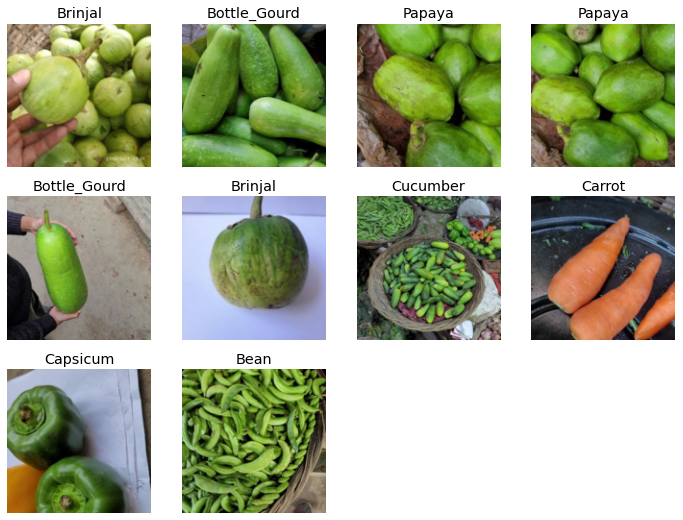

In [19]:
dls = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=GrandparentSplitter(train_name='train',valid_name="validation"),
    get_y=parent_label,
    item_tfms=[Resize(150,method="squish")]
).dataloaders(path,bs=80)

dls.show_batch(max_n=10)

In [20]:
from fastai.callback.schedule import fine_tune
learn = vision_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(2)

C:\Users\Mark Hansen\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\Mark Hansen\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.264604,0.038388,0.012333,06:47


epoch,train_loss,valid_loss,error_rate,time
0,0.032278,0.005703,0.002333,08:44
1,0.004943,0.005099,0.001333,08:43


In [14]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.007140,0.005467,0.001667,06:56


epoch,train_loss,valid_loss,error_rate,time
0,0.016891,0.008692,0.002333,08:39
1,0.002933,0.005471,0.001667,08:38


In [15]:
learn.export("vegetables_model.pkl")